In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
def add_more_info(df):
    df['nodes'] = (df['g1_nodes'] + df['g2_nodes']) / 2
    df['edges'] = (df['g1_edges'] + df['g2_edges']) / 2
    df['nodes^2'] = df['g1_nodes'] * df['g2_nodes']
    df['edges^2'] = df['g1_edges'] * df['g2_edges']
    df['nodes_X_edges'] = (df['g1_nodes'] * df['g1_edges'] + df['g2_nodes'] * df['g2_edges']) / 2
    df['log_nodes_X_edges'] = np.log(df['nodes_X_edges'])
    df['uncommon_nodes'] = df['nodes'] - df['generalization_nodes']
    df['log_uncommon_nodes'] = np.log(df['uncommon_nodes'])
    df['log_avg_time'] = np.log(df['avg_time'])
    df['log_nodes'] = np.log(df['nodes'])
    df['log_nodes^2'] = np.log(df['nodes^2'])
    df['uncommon_edges'] = df['edges'] - df['generalization_edges']
    df['log_uncommon_edges'] = np.log(df['uncommon_edges'])
    df['uncommon_nodes_X_uncommon_edges'] = df['uncommon_nodes'] * df['uncommon_edges']
    df['log_uncommon_nodes_X_uncommon_edges'] = np.log(df['uncommon_nodes_X_uncommon_edges'])
    df['common_nodes_X_common_edges'] = df['generalization_nodes'] * df['generalization_edges']
    df['log_common_nodes_X_common_edges'] = np.log(df['common_nodes_X_common_edges'])

In [67]:
def linear_regression_of(df, x_column, y_column, x_label=None, y_label=None, title=None):
    X = df[x_column].values.reshape(-1, 1)
    Y = df[y_column].values.reshape(-1, 1)
    linear_regressor = LinearRegression()
    linear_regressor.fit(X, Y)
    Y_pred = linear_regressor.predict(X)
    r_squared = r2_score(Y, Y_pred)

    plt.scatter(X, Y, s=5)
    plt.plot(X, Y_pred, color='red')
    if x_label is None:
        x_label = x_column
    plt.xlabel(x_label)
    if y_label is None:
        y_label = y_column
    plt.ylabel(y_label)
    if title is None:
        title = 'Linear Regression'
    plt.title(title)
    plt.show()

    data = {'coef': linear_regressor.coef_[0][0], 'intercept': linear_regressor.intercept_[0], 'r_squared': r_squared}
    print(data)

In [25]:
# Fixer:
df = pd.read_csv("AggregatedDataWithoutDependencies.csv")
df2 = pd.read_csv("AggregatedDataWithoutDependenciesV2.csv")
df['key'] = df.apply(lambda x: f"{x['generalization_nodes']}-{x['generalization_edges']}-{x['generalization_node_variables']}-{x['generalization_edge_variables']}-{x['g1_nodes']}-{x['g1_edges']}-{x['g2_nodes']}-{x['g2_edges']}", axis=1)
df2['key'] = df2.apply(lambda x: f"{x['generalization_nodes']}-{x['generalization_edges']}-{x['generalization_node_variables']}-{x['generalization_edge_variables']}-{x['g1_nodes']}-{x['g1_edges']}-{x['g2_nodes']}-{x['g2_edges']}", axis=1)
fixed = pd.merge(df[['name', 'key']], df2, on='key')
fixed['name'] = fixed['name_x']
fixed = fixed.drop(columns=['name_x', 'name_y', 'key'])
fixed.to_csv('AggregatedDataWithoutDependenciesV2.csv', index=False)

In [29]:
df = pd.read_csv("AggregatedDataWithDependencies.csv")
df2 = pd.read_csv("AggregatedDataWithDependenciesV2.csv")

In [30]:
df.describe()

,generalization_nodes,generalization_edges,generalization_node_variables,generalization_edge_variables,g1_nodes,g1_edges,g2_nodes,g2_edges,time0,time1,time2,time3,time4,time5,time6,time7,time8,time9,avg_time,std_dev
count,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000
mean,803.312075,1443.076531,53.818878,521.527211,1133.259354,2427.465136,1199.189626,2605.187925,415.233844,418.290816,416.289966,418.797619,416.198980,414.966837,415.724490,417.130102,417.382653,416.812075,416.682738,21.005762
std,277.215133,841.964016,23.842790,236.913057,301.759670,941.809199,317.350023,996.010133,349.421478,352.388611,350.440222,353.076615,352.885344,349.547856,350.620341,351.824590,353.674203,351.556177,350.171941,22.897029
min,254.000000,192.000000,0.000000,5.000000,828.000000,1526.000000,828.000000,1526.000000,25.000000,25.000000,24.000000,25.000000,24.000000,25.000000,25.000000,25.000000,25.000000,25.000000,26.000000,0.748331
25%,639.000000,925.000000,39.000000,341.250000,863.000000,1640.000000,871.000000,1640.000000,73.000000,71.750000,74.250000,77.000000,74.750000,73.000000,73.000000,77.750000,75.750000,76.000000,73.675000,4.943429
50%,723.000000,1172.500000,59.000000,584.500000,891.000000,1736.000000,1294.000000,2311.000000,334.000000,334.000000,334.000000,333.500000,332.500000,331.000000,333.000000,332.000000,331.500000,330.000000,333.150000,9.453570
75%,822.000000,1477.250000,70.000000,693.000000,1516.000000,3718.000000,1529.000000,3741.000000,690.000000,705.000000,692.000000,681.500000,690.250000,690.250000,690.000000,683.250000,687.750000,696.000000,701.725000,33.045915
max,1568.000000,3842.000000,127.000000,1302.000000,1580.000000,3917.000000,1580.000000,3917.000000,1878.000000,1880.000000,1786.000000,1887.000000,1792.000000,1828.000000,1856.000000,1874.000000,1896.000000,1843.000000,1831.100000,122.872943


In [31]:
df2.describe()

,generalization_nodes,generalization_edges,generalization_node_variables,generalization_edge_variables,g1_nodes,g1_edges,g2_nodes,g2_edges,time0,time1,time2,time3,time4,time5,time6,time7,time8,time9,avg_time,std_dev
count,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000
mean,803.312075,1443.076531,53.818878,521.527211,1133.259354,2427.465136,1199.189626,2605.187925,360.823980,356.954082,355.934524,356.832483,356.144558,356.191327,357.382653,357.594388,366.342687,381.172619,360.537330,13.890223
std,277.215133,841.964016,23.842790,236.913057,301.759670,941.809199,317.350023,996.010133,292.918637,289.193054,288.880740,289.137205,289.519237,289.794325,290.124003,290.214810,297.831166,310.664931,292.415003,12.122027
min,254.000000,192.000000,0.000000,5.000000,828.000000,1526.000000,828.000000,1526.000000,27.000000,27.000000,25.000000,26.000000,25.000000,26.000000,25.000000,27.000000,26.000000,26.000000,27.100000,0.538516
25%,639.000000,925.000000,39.000000,341.250000,863.000000,1640.000000,871.000000,1640.000000,73.750000,73.000000,72.750000,73.750000,73.000000,70.750000,74.500000,74.500000,73.500000,71.750000,73.250000,3.609708
50%,723.000000,1172.500000,59.000000,584.500000,891.000000,1736.000000,1294.000000,2311.000000,292.500000,294.000000,291.000000,294.000000,290.500000,293.500000,294.000000,290.500000,304.500000,311.500000,297.600000,11.539064
75%,822.000000,1477.250000,70.000000,693.000000,1516.000000,3718.000000,1529.000000,3741.000000,600.250000,592.250000,587.250000,591.500000,590.250000,591.250000,594.000000,589.250000,607.000000,631.250000,598.225000,18.617397
max,1568.000000,3842.000000,127.000000,1302.000000,1580.000000,3917.000000,1580.000000,3917.000000,1603.000000,1503.000000,1487.000000,1502.000000,1490.000000,1502.000000,1517.000000,1491.000000,1484.000000,1589.000000,1506.900000,108.787178


In [32]:
df = pd.read_csv("AggregatedData.csv")
df_with = pd.read_csv("AggregatedDataWithDependenciesV2.csv")
df_without = pd.read_csv("AggregatedDataWithoutDependenciesV2.csv")
add_more_info(df)
add_more_info(df_with)
add_more_info(df_without)
df_without.head()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = geta

,generalization_nodes,generalization_edges,generalization_node_variables,generalization_edge_variables,g1_nodes,g1_edges,g2_nodes,g2_edges,time0,time1,...,log_uncommon_nodes,log_avg_time,log_nodes,log_nodes^2,uncommon_edges,log_uncommon_edges,uncommon_nodes_X_uncommon_edges,log_uncommon_nodes_X_uncommon_edges,common_nodes_X_common_edges,log_common_nodes_X_common_edges
0,664,401,43,223,1266,813,872,632,113,114,...,6.003887,4.695925,6.974479,13.914407,321.5,5.772998,130207.50,11.776885,266264,12.492244
1,534,295,52,217,1266,813,871,585,137,137,...,6.281332,4.911919,6.974011,13.913260,404.0,6.001415,215938.00,12.282747,157530,11.967371
2,537,298,52,218,1266,813,874,591,121,121,...,6.278521,4.853592,6.975414,13.916698,404.0,6.001415,215332.00,12.279936,160026,11.983092
3,612,312,66,323,1266,813,1577,990,298,302,...,6.696417,5.684260,7.259468,14.506897,589.5,6.379275,477200.25,13.075691,190944,12.159735
4,1253,773,19,77,1294,822,1266,813,51,49,...,3.295837,3.916015,7.154615,14.309111,44.5,3.795489,1201.50,7.091326,968569,13.783575


In [34]:
df_with.describe()

,generalization_nodes,generalization_edges,generalization_node_variables,generalization_edge_variables,g1_nodes,g1_edges,g2_nodes,g2_edges,time0,time1,...,log_uncommon_nodes,log_avg_time,log_nodes,log_nodes^2,uncommon_edges,log_uncommon_edges,uncommon_nodes_X_uncommon_edges,log_uncommon_nodes_X_uncommon_edges,common_nodes_X_common_edges,log_common_nodes_X_common_edges
count,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,...,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1.176000e+03,1176.000000,1.176000e+03,1176.000000
mean,803.312075,1443.076531,53.818878,521.527211,1133.259354,2427.465136,1199.189626,2605.187925,360.823980,356.954082,...,-inf,5.374480,7.043684,14.050980,1073.250000,6.514700,5.697143e+05,-inf,1.390029e+06,13.787059
std,277.215133,841.964016,23.842790,236.913057,301.759670,941.809199,317.350023,996.010133,292.918637,289.193054,...,NaN,1.163698,0.190382,0.376099,729.453782,1.210451,5.533530e+05,NaN,1.477362e+06,0.777451
min,254.000000,192.000000,0.000000,5.000000,828.000000,1526.000000,828.000000,1526.000000,27.000000,27.000000,...,-inf,3.299534,6.725034,13.450031,2.500000,0.916291,0.000000e+00,-inf,4.876800e+04,10.794830
25%,639.000000,925.000000,39.000000,341.250000,863.000000,1640.000000,871.000000,1640.000000,73.750000,73.000000,...,4.442651,4.293878,6.870572,13.733050,306.625000,5.725623,2.568375e+04,10.153613,5.917335e+05,13.290812
50%,723.000000,1172.500000,59.000000,584.500000,891.000000,1736.000000,1294.000000,2311.000000,292.500000,294.000000,...,6.159095,5.695750,7.082129,14.084028,1208.750000,7.097342,6.101652e+05,13.321485,8.454610e+05,13.647637
75%,822.000000,1477.250000,70.000000,693.000000,1516.000000,3718.000000,1529.000000,3741.000000,600.250000,592.250000,...,6.270988,6.393966,7.119635,14.191065,1650.500000,7.408834,8.447790e+05,13.646830,1.212196e+06,14.007941
max,1568.000000,3842.000000,127.000000,1302.000000,1580.000000,3917.000000,1580.000000,3917.000000,1603.000000,1503.000000,...,6.893656,7.317810,7.364230,14.728460,2551.000000,7.844241,2.515286e+06,14.737897,6.024256e+06,15.611305


In [30]:
times_names = [f'time{i}' for i in range(10)]
times_names.append('avg_time')
times_names.append('std_dev')
times_names.append('nodes')
times_names.append('edges')
df.sum()[times_names] / 60_000

time0         19.51955
time1        19.440283
time2        19.541217
time3        20.921967
time4        21.033433
time5           21.141
time6        21.831067
time7         21.63935
time8        21.764733
time9        21.723017
avg_time     20.855562
std_dev        1.47799
nodes        92.384417
edges       129.060925
dtype: object

In [8]:
quantile = df['avg_time'].quantile(0.99)
plt_df = df[df['avg_time'] < quantile]

<Axes: xlabel='nodes', ylabel='time (ms)'>

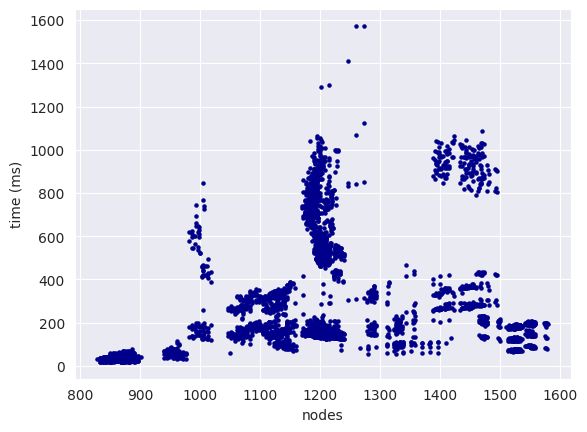

In [9]:
df.plot.scatter(x='nodes', y='avg_time', c='DarkBlue', s=5, ylabel='time (ms)', xlabel='nodes')

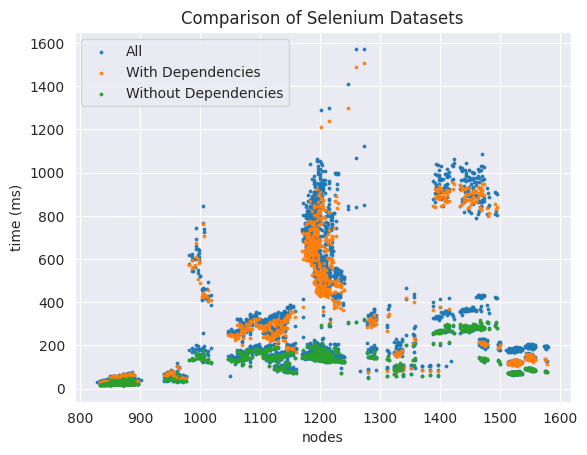

In [51]:
# Create a scatter plot for all metrics
plt.scatter(df['nodes'], df['avg_time'], label='All', s=3, alpha=0.9)
plt.scatter(df_with['nodes'], df_with['avg_time'], label='With Dependencies', s=3, alpha=0.9)
plt.scatter(df_without['nodes'], df_without['avg_time'], label='Without Dependencies', s=3, alpha=0.9)

# Customize the plot
plt.xlabel('nodes')
plt.ylabel('time (ms)')
plt.title('Comparison of Selenium Datasets')
plt.legend()

# Display the plot
plt.show()

<Axes: xlabel='edges', ylabel='time (ms)'>

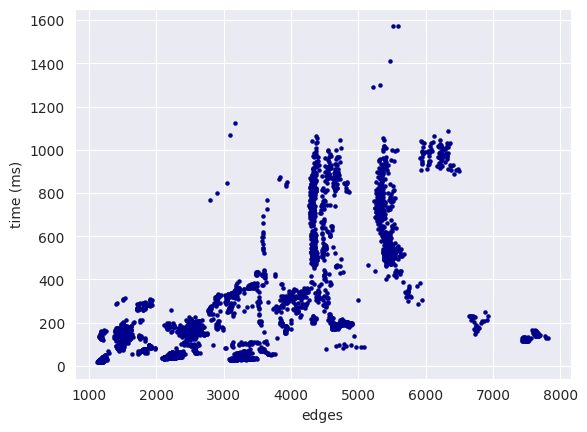

In [36]:
df.plot.scatter(x='edges', y='avg_time', c='DarkBlue', s=5, ylabel='time (ms)', xlabel='edges')

<Axes: xlabel='uncommon nodes', ylabel='time (ms)'>

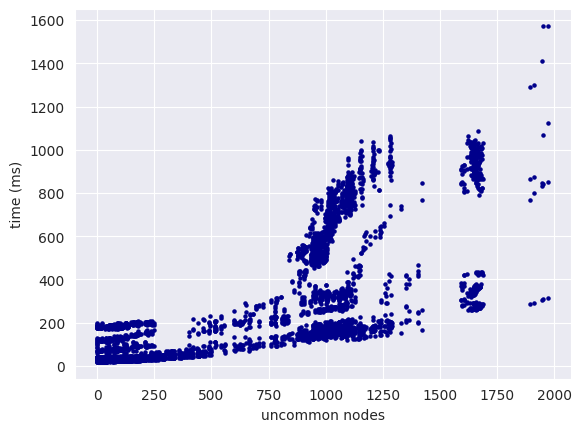

In [42]:
df.plot.scatter(x='uncommon_nodes', y='avg_time', c='DarkBlue', s=5, ylabel='time (ms)', xlabel='uncommon nodes')

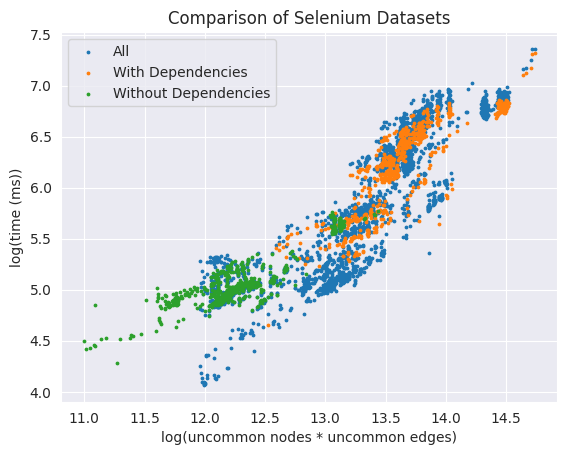

In [65]:
df2 = df[df['uncommon_nodes_X_uncommon_edges'] > df['uncommon_nodes_X_uncommon_edges'].quantile(0.4)]
df_with2 = df_with[df_with['uncommon_nodes_X_uncommon_edges'] > df_with['uncommon_nodes_X_uncommon_edges'].quantile(0.4)]
df_without2 = df_without[df_without['uncommon_nodes_X_uncommon_edges'] > df_without['uncommon_nodes_X_uncommon_edges'].quantile(0.4)]

# Create a scatter plot for all metrics
plt.scatter(df2['log_uncommon_nodes_X_uncommon_edges'], df2['log_avg_time'], label='All', s=3)
plt.scatter(df_with2['log_uncommon_nodes_X_uncommon_edges'], df_with2['log_avg_time'], label='With Dependencies', s=3)
plt.scatter(df_without2['log_uncommon_nodes_X_uncommon_edges'], df_without2['log_avg_time'], label='Without Dependencies', s=3)

# Customize the plot
plt.xlabel('log(uncommon nodes * uncommon edges)')
plt.ylabel('log(time (ms))')
plt.title('Comparison of Selenium Datasets')
plt.legend()

# Display the plot
plt.show()

<Axes: xlabel='common nodes', ylabel='time (ms)'>

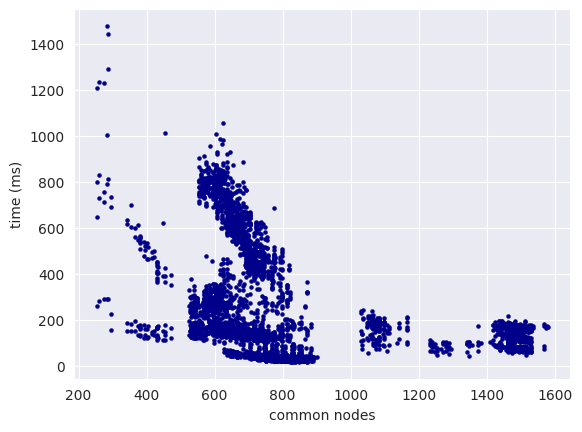

In [110]:
df.plot.scatter(x='generalization_nodes', y='avg_time', c='DarkBlue', s=5, ylabel='time (ms)', xlabel='common nodes')

<Axes: xlabel='edges', ylabel='time (ms)'>

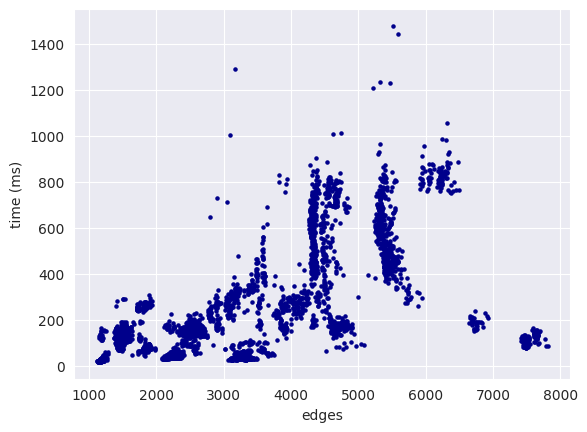

In [112]:
df.plot.scatter(x='edges', y='avg_time', c='DarkBlue', s=5, ylabel='time (ms)', xlabel='edges')

<Axes: xlabel='common edges', ylabel='time (ms)'>

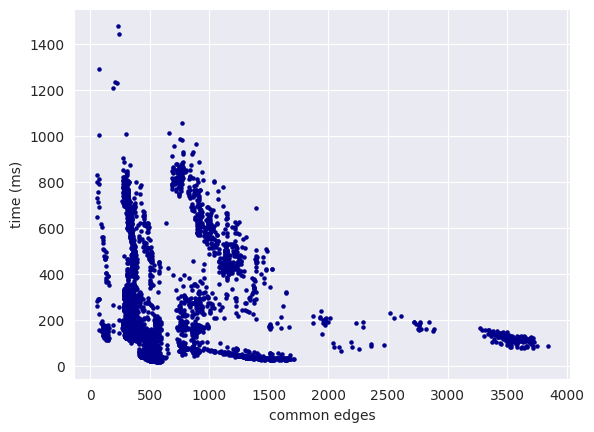

In [114]:
df.plot.scatter(x='generalization_edges', y='avg_time', c='DarkBlue', s=5, ylabel='time (ms)', xlabel='common edges')

<Axes: xlabel='uncommon edges', ylabel='time (ms)'>

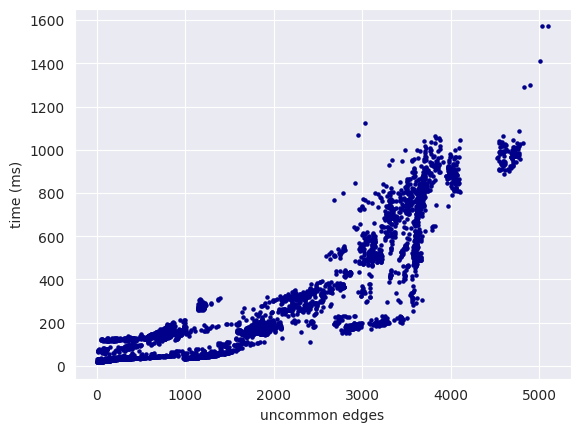

In [53]:
df.plot.scatter(x='uncommon_edges', y='avg_time', c='DarkBlue', s=5, ylabel='time (ms)', xlabel='uncommon edges')

<Axes: xlabel='log(uncommon edges)', ylabel='log(time (ms))'>

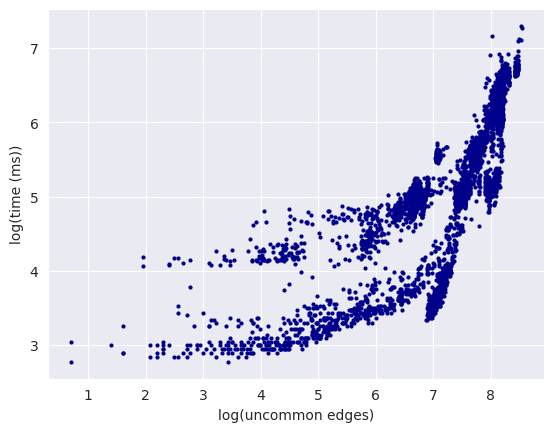

In [117]:
df.plot.scatter(x='log_uncommon_edges', y='log_time', c='DarkBlue', s=4, ylabel='log(time (ms))', xlabel='log(uncommon edges)')

<Axes: xlabel='log(uncommon nodes)', ylabel='log(time (ms))'>

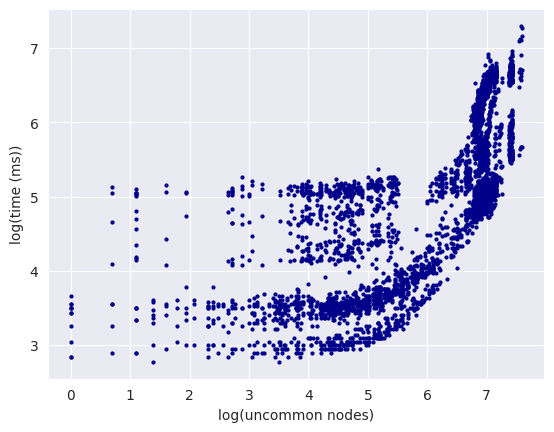

In [118]:
df.plot.scatter(x='log_uncommon_nodes', y='log_time', c='DarkBlue', s=4, ylabel='log(time (ms))', xlabel='log(uncommon nodes)')

<Axes: xlabel='log(nodes)', ylabel='log(time (ms))'>

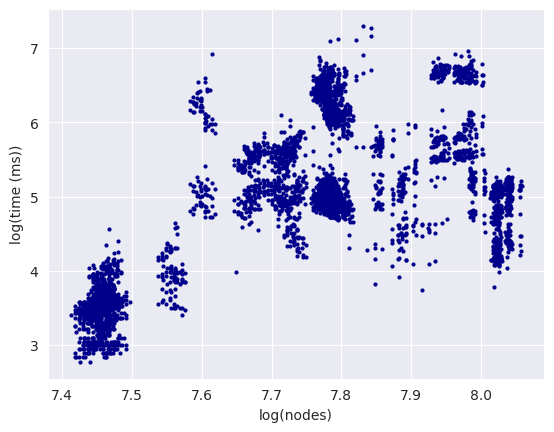

In [119]:
df.plot.scatter(x='log_nodes', y='log_time', c='DarkBlue', s=4, ylabel='log(time (ms))', xlabel='log(nodes)')

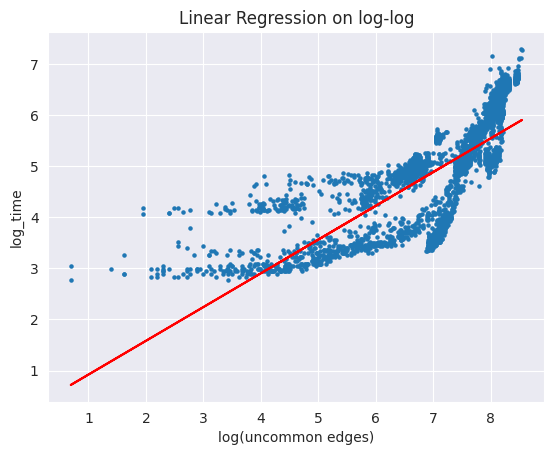

(array([[0.66120729]]), array([0.25997117]), 0.5546120322958428)

In [120]:
linear_regression_of(df, 'log_uncommon_edges', 'log_time', x_label='log(uncommon edges)', y_label='log_time', title='Linear Regression on log-log')

<Axes: xlabel='nodes * edges', ylabel='time (ms)'>

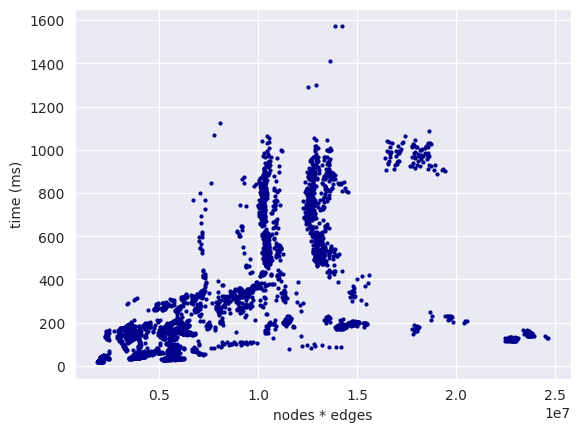

In [54]:
df.plot.scatter(x='nodes_X_edges', y='avg_time', c='DarkBlue', s=4, ylabel='time (ms)', xlabel='nodes * edges')

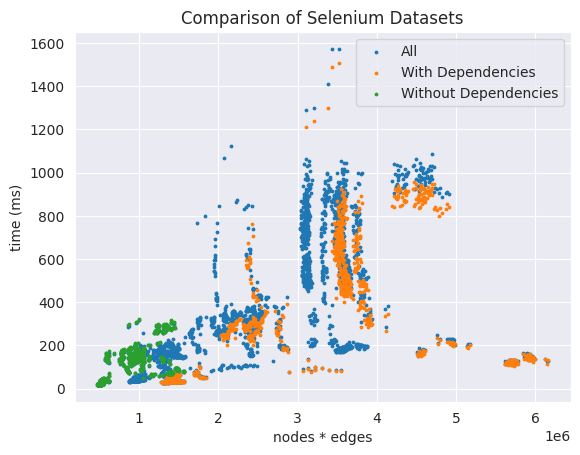

In [55]:
# Create a scatter plot for all metrics
plt.scatter(df['nodes_X_edges'], df['avg_time'], label='All', s=3)
plt.scatter(df_with['nodes_X_edges'], df_with['avg_time'], label='With Dependencies', s=3)
plt.scatter(df_without['nodes_X_edges'], df_without['avg_time'], label='Without Dependencies', s=3)

# Customize the plot
plt.xlabel('nodes * edges')
plt.ylabel('time (ms)')
plt.title('Comparison of Selenium Datasets')
plt.legend()

# Display the plot
plt.show()

<Axes: xlabel='uncommon nodes * uncommon edges', ylabel='time (ms)'>

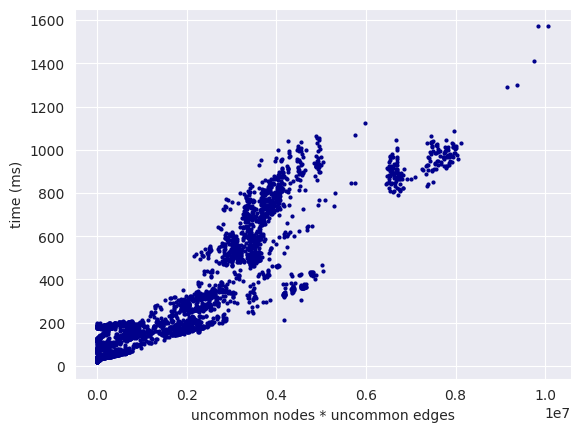

In [60]:
df.plot.scatter(x='uncommon_nodes_X_uncommon_edges', y='avg_time', c='DarkBlue', s=4, ylabel='time (ms)', xlabel='uncommon nodes * uncommon edges')

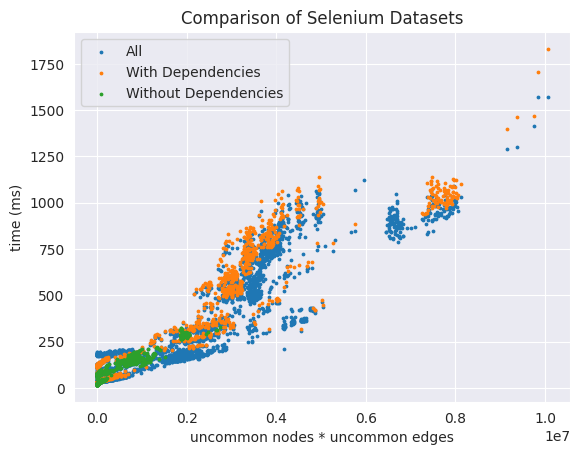

In [57]:
# Create a scatter plot for all metrics
plt.scatter(df['uncommon_nodes_X_uncommon_edges'], df['avg_time'], label='All', s=3)
plt.scatter(df_with['uncommon_nodes_X_uncommon_edges'], df_with['avg_time'], label='With Dependencies', s=3)
plt.scatter(df_without['uncommon_nodes_X_uncommon_edges'], df_without['avg_time'], label='Without Dependencies', s=3)

# Customize the plot
plt.xlabel('uncommon nodes * uncommon edges')
plt.ylabel('time (ms)')
plt.title('Comparison of Selenium Datasets')
plt.legend()

# Display the plot
plt.show()

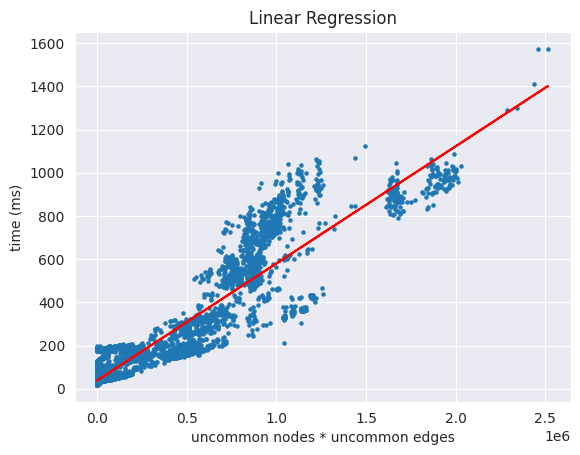

{'coef': 0.0005422200003253764, 'intercept': 37.6718959976657, 'r_squared': 0.8326266496700414}


In [71]:
linear_regression_of(df, 'uncommon_nodes_X_uncommon_edges', 'avg_time', x_label='uncommon nodes * uncommon edges', y_label='time (ms)', title='Linear Regression')

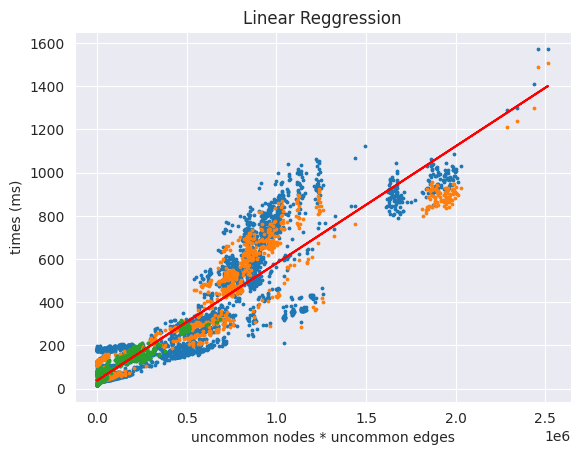

{'coef': 0.0005422200003253764, 'intercept': 37.6718959976657, 'r_squared': 0.8326266496700414, 'r_squared_with': 0.8719175340713028, 'r_squared_without': 0.8915446183741533}


In [76]:
x_column = 'uncommon_nodes_X_uncommon_edges'
y_column = 'avg_time'

X = df[x_column].values.reshape(-1, 1)
Y = df[y_column].values.reshape(-1, 1)
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)
r_squared = r2_score(Y, Y_pred)

plt.scatter(X, Y, s=3, label='All')
plt.plot(X, Y_pred, color='red')

X = df_with[x_column].values.reshape(-1, 1)
Y = df_with[y_column].values.reshape(-1, 1)
Y_pred = linear_regressor.predict(X)
r_squared_with = r2_score(Y, Y_pred)
plt.scatter(X, Y, s=3, label='With Dependencies')

X = df_without[x_column].values.reshape(-1, 1)
Y = df_without[y_column].values.reshape(-1, 1)
Y_pred = linear_regressor.predict(X)
r_squared_without = r2_score(Y, Y_pred)
plt.scatter(X, Y, s=3, label='Without Dependencies')


plt.xlabel('uncommon nodes * uncommon edges')
plt.ylabel('times (ms)')
plt.title('Linear Reggression')
plt.show()

data = {'coef': linear_regressor.coef_[0][0], 'intercept': linear_regressor.intercept_[0], 'r_squared': r_squared, 'r_squared_with': r_squared_with, 'r_squared_without': r_squared_without}
print(data)

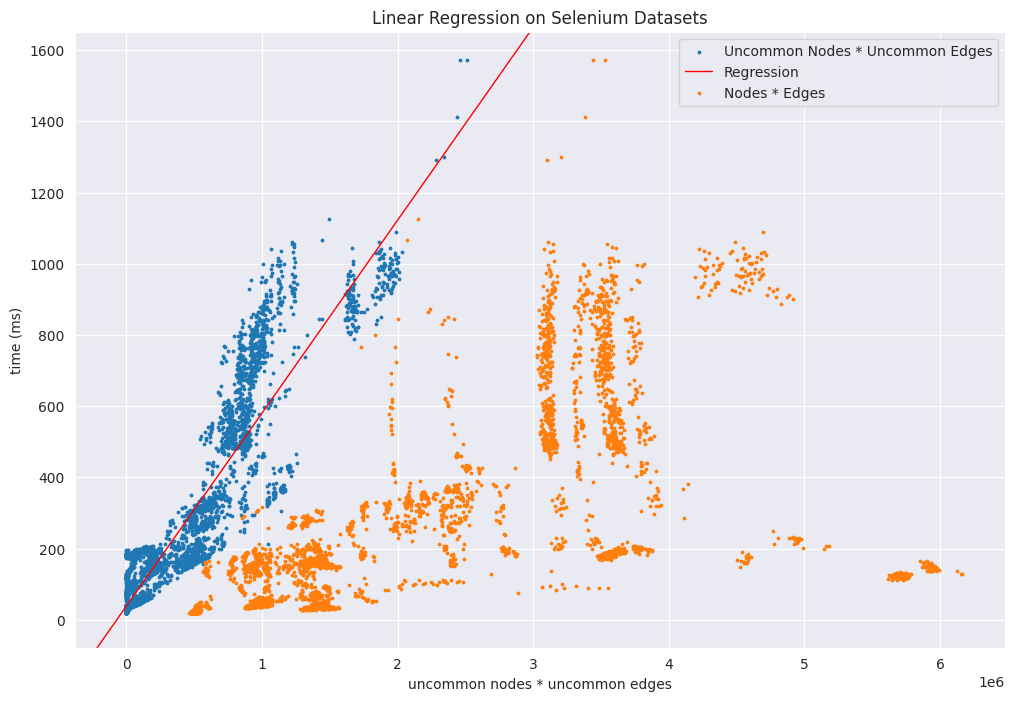

In [89]:
# Create a scatter plot for all metrics
plt.figure(figsize=(12, 8))
plt.scatter(df['uncommon_nodes_X_uncommon_edges'], df['avg_time'], label='Uncommon Nodes * Uncommon Edges', s=3)
# plt.scatter(df_with['uncommon_nodes_X_uncommon_edges'], df_with['avg_time'], label='With Dependencies(Uncommon)', s=3)
# plt.scatter(df_without['uncommon_nodes_X_uncommon_edges'], df_without['avg_time'], label='Without Dependencies(Uncommon)', s=3)
plt.axline((0, 37.6718959976657), (-37.6718959976657/0.0005422200003253764, 0), linewidth=1, color='r', label='Regression')
plt.scatter(df['nodes_X_edges'], df['avg_time'], label='Nodes * Edges', s=3)
# plt.scatter(df_with['nodes_X_edges'], df_with['avg_time'], label='With Dependencies', s=3)
# plt.scatter(df_without['nodes_X_edges'], df_without['avg_time'], label='Without Dependencies', s=3)

# Customize the plot
plt.xlabel('uncommon nodes * uncommon edges')
plt.ylabel('time (ms)')
plt.title('Linear Regression on Selenium Datasets')
plt.legend()

# Display the plot
plt.show()

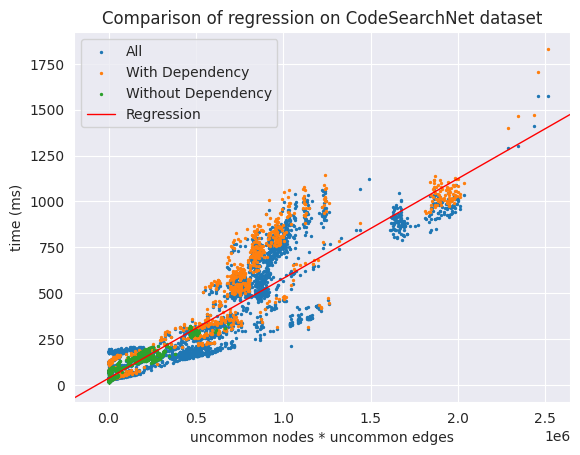

In [16]:
# Create a scatter plot for all metrics
plt.scatter(df['uncommon_nodes_X_uncommon_edges'], df['avg_time'], label='All', s=2)
plt.scatter(df_with['uncommon_nodes_X_uncommon_edges'], df_with['avg_time'], label='With Dependency', s=2)
plt.scatter(df_without['uncommon_nodes_X_uncommon_edges'], df_without['avg_time'], label='Without Dependency', s=2)
plt.axline((0, 36.02711742), (-36.02711742/0.00054406, 0), linewidth=1, color='r', label='Regression')

# Customize the plot
plt.xlabel('uncommon nodes * uncommon edges')
plt.ylabel('time (ms)')
plt.title('Comparison of regression on CodeSearchNet dataset')
plt.legend()

# Display the plot
plt.show()

In [66]:
margin = 350
df1 = df[df['uncommon_nodes'] > margin]
df2 = df[df['uncommon_nodes'] <= margin]

<Axes: xlabel='uncommon nodes * uncommon edges', ylabel='time (ms)'>

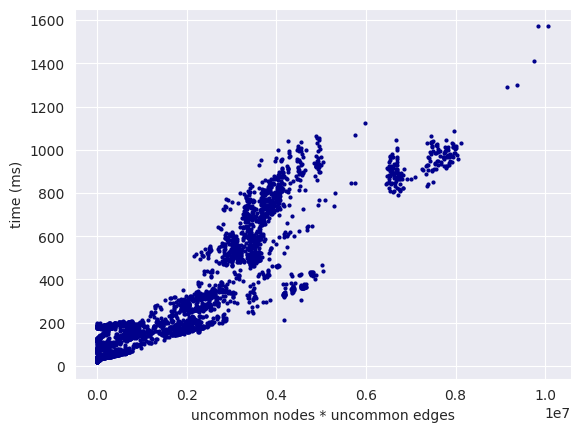

In [67]:
df.plot.scatter(x='uncommon_nodes_X_uncommon_edges', y='avg_time', c='DarkBlue', s=4, ylabel='time (ms)', xlabel='uncommon nodes * uncommon edges')

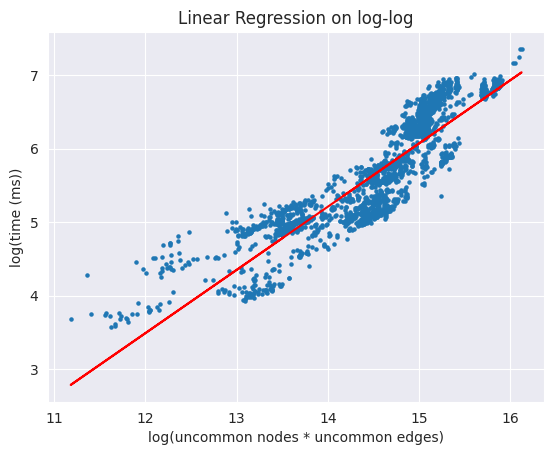

(array([[0.8617569]]), array([-6.85379404]), 0.7798307484439815)

In [69]:
linear_regression_of(df1[df1['uncommon_nodes_X_uncommon_edges'] != 0], 'log_uncommon_nodes_X_uncommon_edges', 'log_avg_time', x_label='log(uncommon nodes * uncommon edges)', y_label='log(time (ms))', title='Linear Regression on log-log')

<Axes: xlabel='nodes', ylabel='time (ms)'>

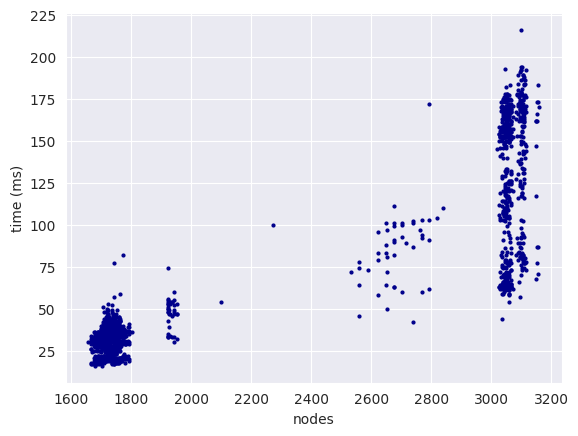

In [128]:
df2.plot.scatter(x='nodes', y='avg_time', c='DarkBlue', s=4, ylabel='time (ms)', xlabel='nodes')

<Axes: xlabel='edges', ylabel='time (ms)'>

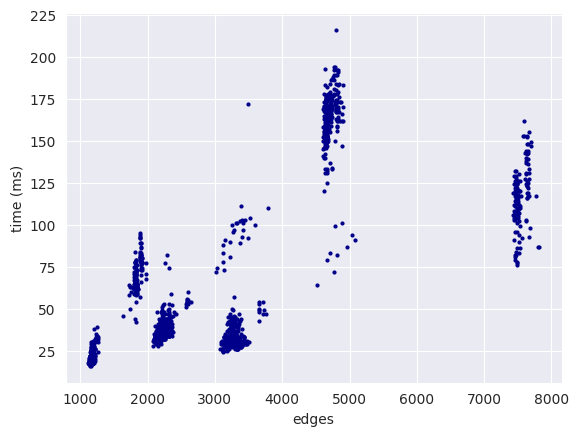

In [129]:
df2.plot.scatter(x='edges', y='avg_time', c='DarkBlue', s=4, ylabel='time (ms)', xlabel='edges')

<Axes: xlabel='nodes * edges', ylabel='time (ms)'>

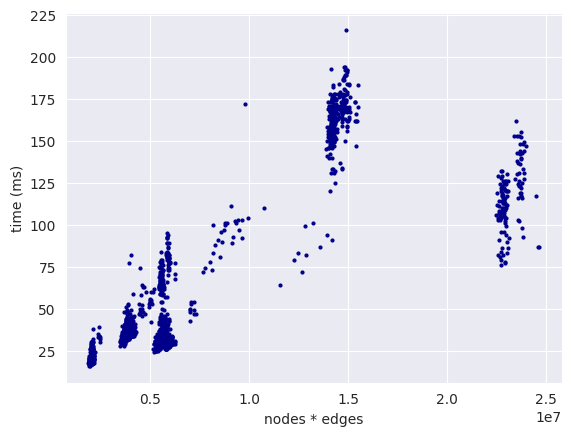

In [130]:
df2.plot.scatter(x='nodes_X_edges', y='avg_time', c='DarkBlue', s=4, ylabel='time (ms)', xlabel='nodes * edges')

<Axes: xlabel='nodes', ylabel='time (ms)'>

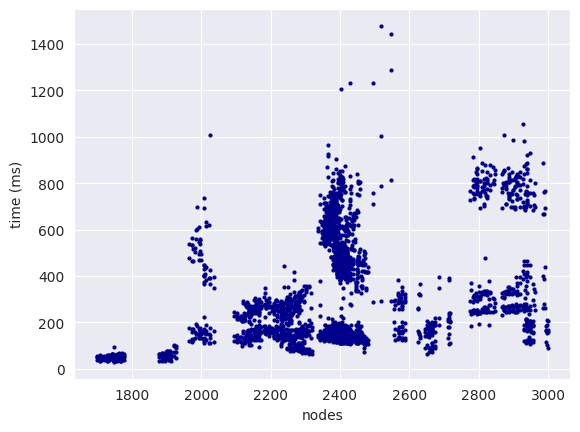

In [132]:
df1.plot.scatter(x='nodes', y='avg_time', c='DarkBlue', s=4, ylabel='time (ms)', xlabel='nodes')

<Axes: xlabel='nodesXedges', ylabel='time (ms)'>

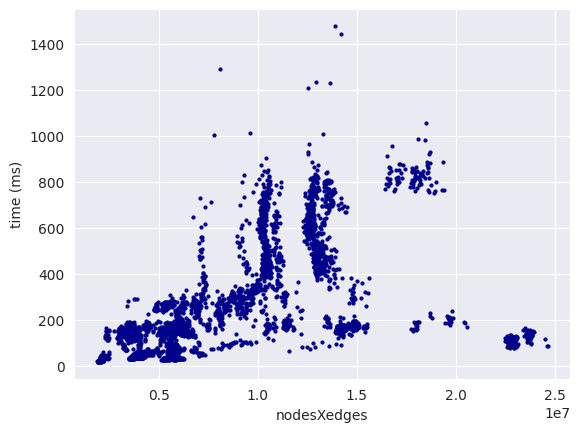

In [133]:
df.plot.scatter(x='nodes_X_edges', y='avg_time', c='DarkBlue', s=4, ylabel='time (ms)', xlabel='nodes_X_edges')

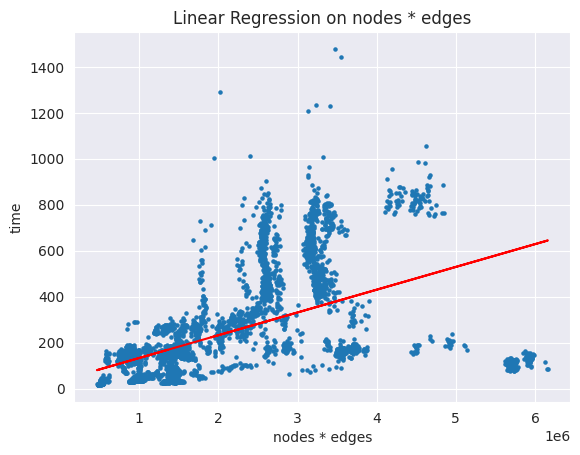

(array([[9.90705935e-05]]), array([34.08023828]), 0.2925285151772288)

In [198]:
linear_regression_of(df, 'nodes_X_edges', 'avg_time', x_label='nodes * edges', y_label='avg_time', title='Linear Regression on nodes * edges')

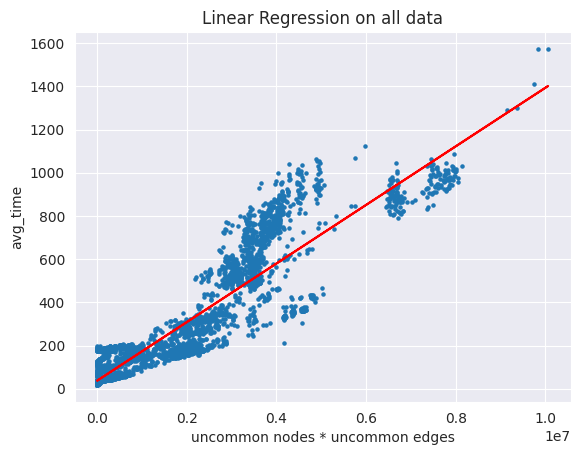

(array([[0.00013556]]), array([37.671896]), 0.8326266496700414)

In [180]:
linear_regression_of(df, 'uncommon_nodes_X_uncommon_edges', 'avg_time', x_label='uncommon nodes * uncommon edges', y_label='avg_time', title='Linear Regression on all data')

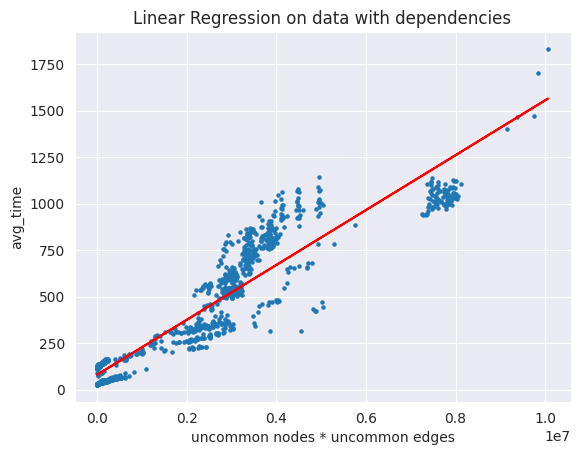

(array([[0.00014749]]), array([80.57824171]), 0.8691130000333376)

In [113]:
linear_regression_of(df_with, 'uncommon_nodes_X_uncommon_edges', 'avg_time', x_label='uncommon nodes * uncommon edges', y_label='avg_time', title='Linear Regression on data with dependencies')

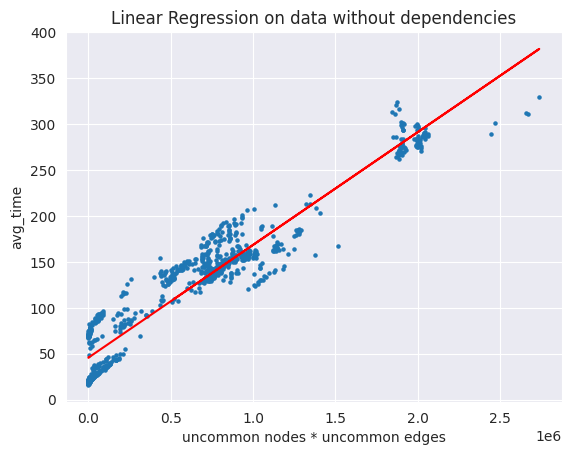

(array([[0.00012282]]), array([45.73277054]), 0.9069966031756571)

In [111]:
linear_regression_of(df_without, 'uncommon_nodes_X_uncommon_edges', 'avg_time', x_label='uncommon nodes * uncommon edges', y_label='avg_time', title='Linear Regression on data without dependencies')

In [115]:
df.describe()['uncommon_nodes'] / df.describe()['nodes']

count    1.000000
mean     0.307978
std      1.161723
min      0.000000
25%      0.083247
50%      0.396472
75%      0.426038
max      0.624051
dtype: float64

In [116]:
df.describe()['uncommon_edges'] / df.describe()['edges']

count    1.000000
mean     0.564294
std      0.789265
min      0.001787
25%      0.375533
50%      0.612927
75%      0.660344
max      0.652764
dtype: float64

<Axes: xlabel='nodes * edges', ylabel='time (ms)'>

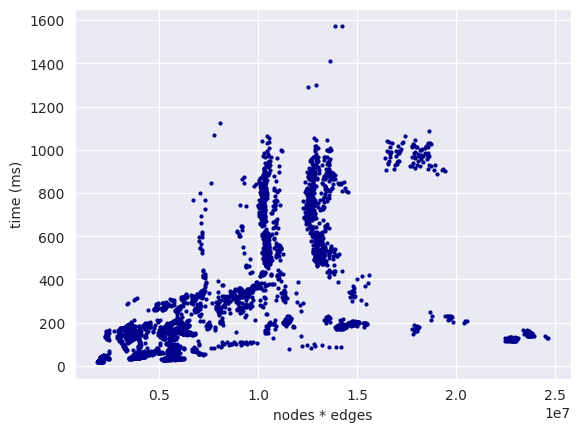

In [74]:
df.plot.scatter(x='nodes_X_edges', y='avg_time', c='DarkBlue', s=4, ylabel='time (ms)', xlabel='nodes * edges')

In [104]:
import math
import re

patternV2 = re.compile(r'(^2.*txtvs)|(vs2.*txt$)')
patternV3 = re.compile(r'(^3.*txtvs)|(vs3.*txt$)')
patternV4 = re.compile(r'(^4.*txtvs)|(vs4.*txt$)')

df['Group'] = df['name'].apply(lambda x:
                               '2vs3' if patternV2.search(x) and patternV3.search(x) else (
                                   '2vs4' if patternV2.search(x) and patternV4.search(x) else (
                                       '3vs3' if patternV3.search(x) and patternV3.search(x) else (
                                           '3vs4' if patternV3.search(x) and patternV4.search(x) else 'Other'
                               ))))
df['nodes_differences'] = (df['g1_nodes'] - df['g2_nodes']).abs()
df['edges_differences'] = (df['g1_edges'] - df['g2_edges']).abs()

In [92]:
df[(df['nodes_X_edges'] > 10_000_000) & (df['nodes_X_edges'] < 12_000_000)]

,name,Group
1,1.0.11-all.txtvs2.0.0-all.txt,Other
113,2.0.0-all.txtvs4.0.0-alpha-3-all.txt,2vs4
154,2.0.0.txtvs3.150.0-all.txt,2vs3
204,2.10.0-all.txtvs4.0.0-alpha-3-all.txt,2vs4
206,2.10.0-all.txtvs4.0.0.txt,2vs4
...,...,...
4683,4.9.1-all.txtvs3.9.0.txt,3vs3
4685,4.9.1-all.txtvs3.9.1.txt,3vs3
4688,4.9.1-all.txtvs4.0.0-alpha-3.txt,Other
4691,4.9.1-all.txtvs4.10.txt,Other


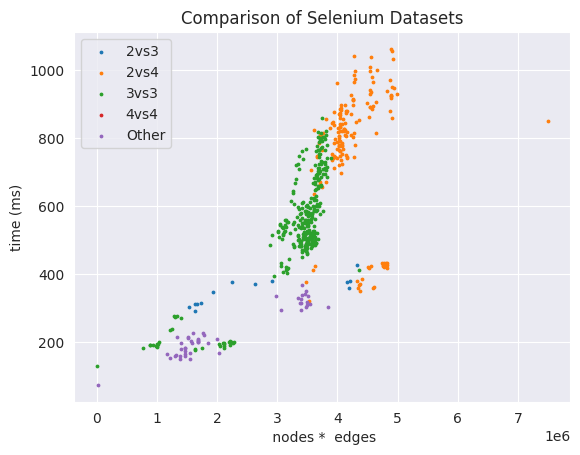

In [107]:
goal_df = df[(df['nodes_X_edges'] > 10_000_000) & (df['nodes_X_edges'] < 12_000_000)]

# Create a scatter plot for all metrics
for label in ['2vs3', '2vs4', '3vs3', '4vs4', 'Other']:
    plt_df = goal_df[goal_df['Group'] == label]
    plt.scatter(plt_df['uncommon_nodes_X_uncommon_edges'], plt_df['avg_time'], label=label, s=3)

# Customize the plot
plt.xlabel(' nodes *  edges')
plt.ylabel('time (ms)')
plt.title('Comparison of Selenium Datasets')
plt.legend()

# Display the plot
plt.show()

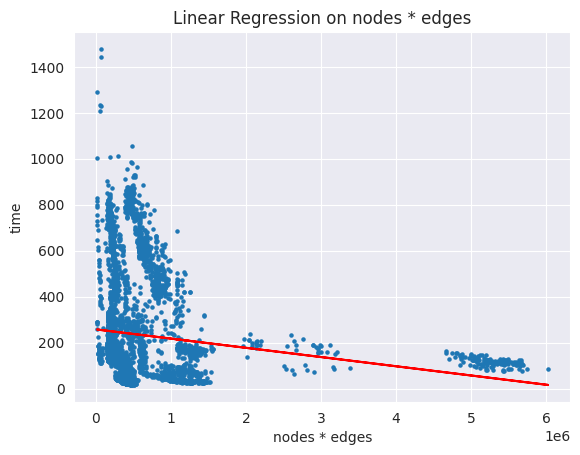

(array([[-4.01420064e-05]]), array([257.44101629]), 0.025678040241625122)

In [175]:
linear_regression_of(df, 'common_nodes_X_common_edges', 'avg_time', x_label='nodes * edges', y_label='avg_time', title='Linear Regression on nodes * edges')

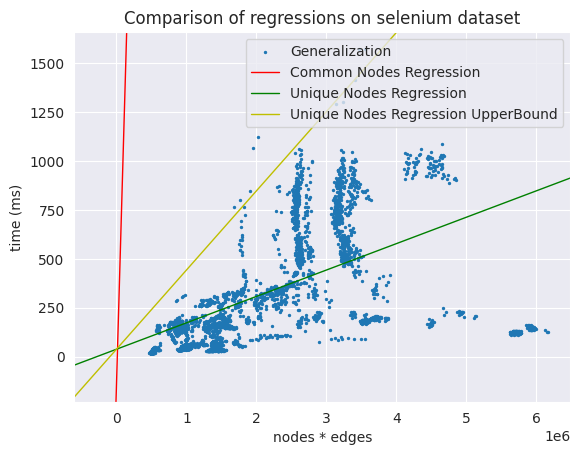

In [121]:
# Create a scatter plot for all metrics
plt.scatter(df['nodes_X_edges']/4, df['avg_time'], label='Generalization', s=2)
plt.axline((0, -144.84), (144.84/0.0124, 0), linewidth=1, color='r', label='Common Nodes Regression')
plt.axline((0, 37.67), (-37.67/0.000135, 0), linewidth=1, color='g', label='Unique Nodes Regression')
plt.axline((0, 37.67), (-37.67/(0.000135 * 3), 0), linewidth=1, color='y', label='Unique Nodes Regression UpperBound')

# Customize the plot
plt.xlabel('nodes * edges')
plt.ylabel('time (ms)')
plt.title('Comparison of regressions on selenium dataset')
plt.legend()

# Display the plot
plt.show()

In [20]:
df.describe()[['nodes', 'edges', 'uncommon_nodes_X_uncommon_edges']]

,nodes,edges,uncommon_nodes_X_uncommon_edges
count,4753.000000,4753.000000,4.753000e+03
mean,1166.224490,1629.214286,4.160682e+05
std,218.987951,793.955233,4.470357e+05
min,828.000000,559.500000,0.000000e+00
25%,961.000000,1054.500000,3.595500e+04
50%,1190.500000,1377.000000,2.341305e+05
75%,1240.500000,2240.500000,6.781308e+05
max,1580.000000,3908.000000,2.515286e+06


<Axes: ylabel='Frequency'>

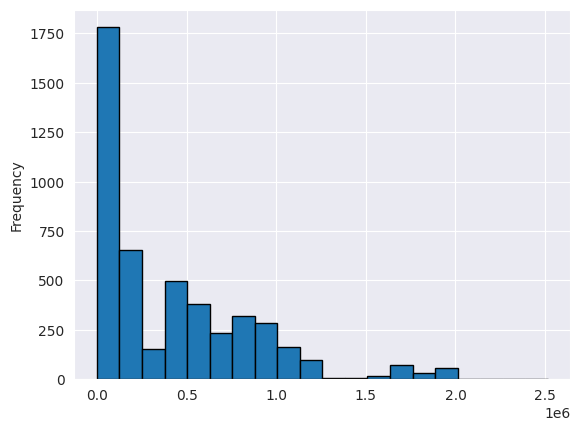

In [21]:
df['uncommon_nodes_X_uncommon_edges'].plot(kind='hist', edgecolor='black', bins=20)

## Nodes

In [94]:
nodes_avg = 1166.22
nodes_std_dev = 219
edges_avg = 1629.21
edges_std_dev = 794
num_reps = 1000
num_simulations = 1000

In [95]:
def choose(n, k):
    numerator = 1
    denominator = 1
    for i in reversed(range(n - k + 1, n + 1)):
        numerator *= i
    for i in reversed(range(1, k + 1)):
        denominator *= i
    return numerator / denominator

def calc_edges(n):
    n = int(n)
    rand = random.random()
    if rand < 1:
        edge = random.randint(n, int(choose(n, 2) / 100))
    else:
        rand = random.random()
        if  rand < 1/3:
            edge = 0.51485643 * n - 142.32773687
        elif rand < 2/3:
            edge = 1.77 * n - 436.14
        elif rand < 5/6:
            edge = 1.18 * n + 600
        else:
            edge = 3.23 * n - 1171
        if edge < 0:
            edge = 0
    return edge

In [96]:
sample_nodes = np.random.normal(nodes_avg, nodes_std_dev, num_reps).round(2)
sample_nodes = sample_nodes[sample_nodes > 0]
num_reps = sample_nodes.size
sample_df = pd.DataFrame(index=range(num_reps), data={'nodes': sample_nodes})
sample_df['edges'] = sample_df['nodes'].apply(calc_edges)
sample_df

,nodes,edges
0,1478.36,6716
1,1426.60,8003
2,1601.45,9673
3,1495.58,5325
4,1651.78,11652
...,...,...
995,918.81,2824
996,1108.95,3561
997,951.30,4305
998,1547.70,4192


<Axes: ylabel='Frequency'>

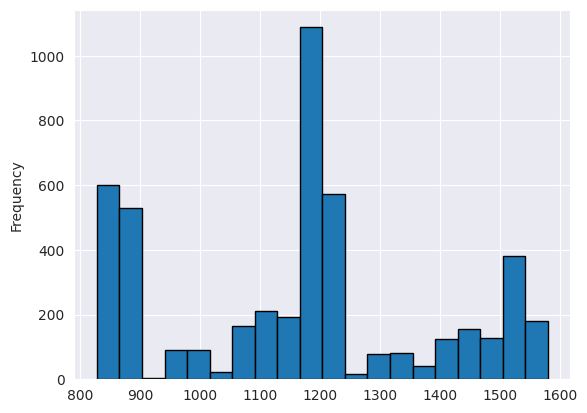

In [97]:
df['nodes'].plot(kind='hist', edgecolor='black', bins=20)

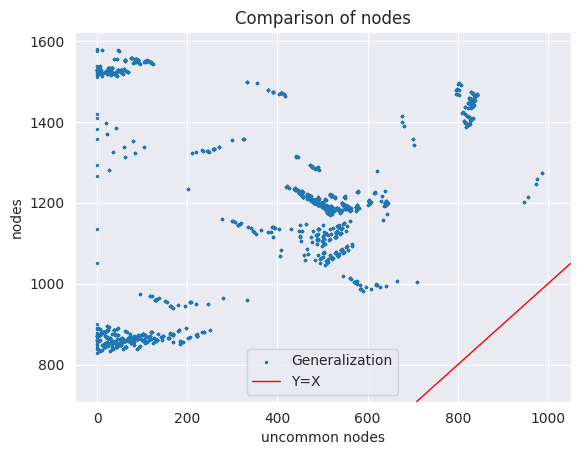

In [98]:
# Create a scatter plot for all metrics
plt.scatter(df['uncommon_nodes'], df['nodes'], label='Generalization', s=2)
plt.axline((750, 750), (1000, 1000), linewidth=1, color='r', label='Y=X')

# Customize the plot
plt.xlabel('uncommon nodes')
plt.ylabel('nodes')
plt.title('Comparison of nodes')
plt.legend()

# Display the plot
plt.show()

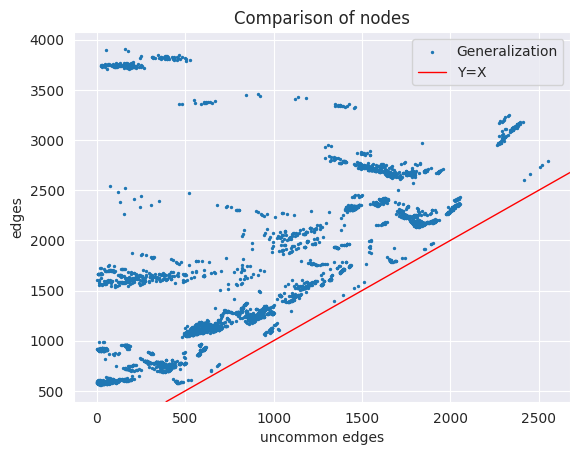

In [28]:
# Create a scatter plot for all metrics
plt.scatter(df['uncommon_edges'], df['edges'], label='Generalization', s=2)
plt.axline((1000, 1000), (2000, 2000), linewidth=1, color='r', label='Y=X')

# Customize the plot
plt.xlabel('uncommon edges')
plt.ylabel('edges')
plt.title('Comparison of nodes')
plt.legend()

# Display the plot
plt.show()

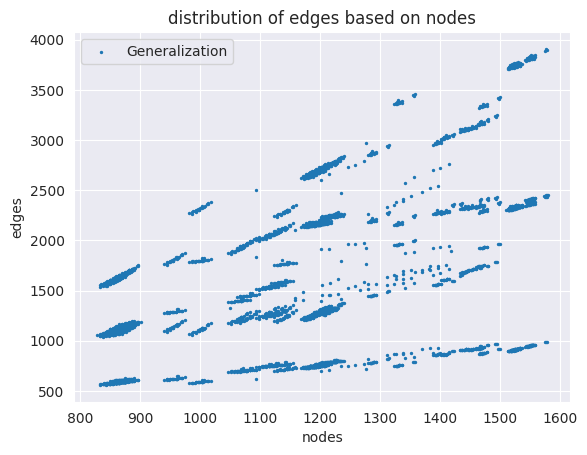

In [29]:
# Create a scatter plot for all metrics
plt.scatter(df['nodes'], df['edges'], label='Generalization', s=2)

# Customize the plot
plt.xlabel('nodes')
plt.ylabel('edges')
plt.title('distribution of edges based on nodes')
plt.legend()

# Display the plot
plt.show()

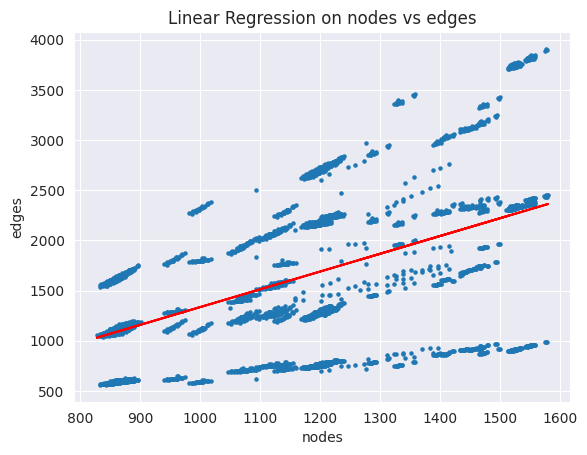

(array([[1.7709751]]), array([-436.1402425]), 0.2386015805788686)

In [30]:
linear_regression_of(df, 'nodes', 'edges', x_label='nodes', y_label='edges', title='Linear Regression on nodes vs edges')

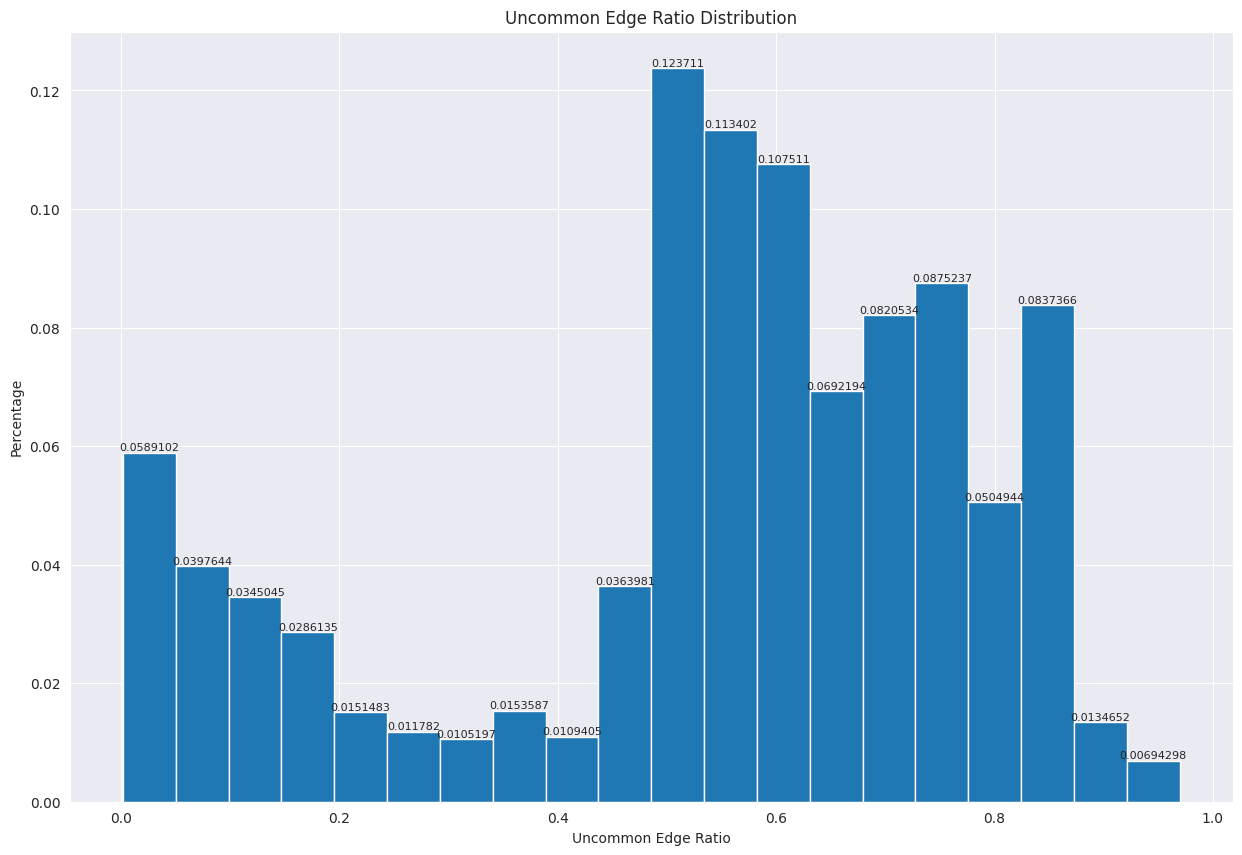

In [32]:
plt.figure(figsize=(15, 10))
values, bins, bars = plt.hist(df['uncommon_edges']/df['edges'], edgecolor='white', bins=20, weights=np.ones(len(df)) / len(df))
plt.xlabel("Uncommon Edge Ratio")
plt.ylabel("Percentage")
plt.title('Uncommon Edge Ratio Distribution')
plt.bar_label(bars, fontsize=8)
plt.show()

In [102]:
uncommon_edges_ratio_values = [0.05 * i for i in range(20)]
uncommon_edges_ratio_prob = np.array([.059, .039, .034, .028, .015, .012, .010, .015, .01, .036, .124, .113, .107, .069, .082, .087, .05, .84, .013, .007])
uncommon_edges_ratio_prob /= sum(uncommon_edges_ratio_prob)
uncommon_edges_ratio = np.random.choice(uncommon_edges_ratio_values, num_reps, p=uncommon_edges_ratio_prob)

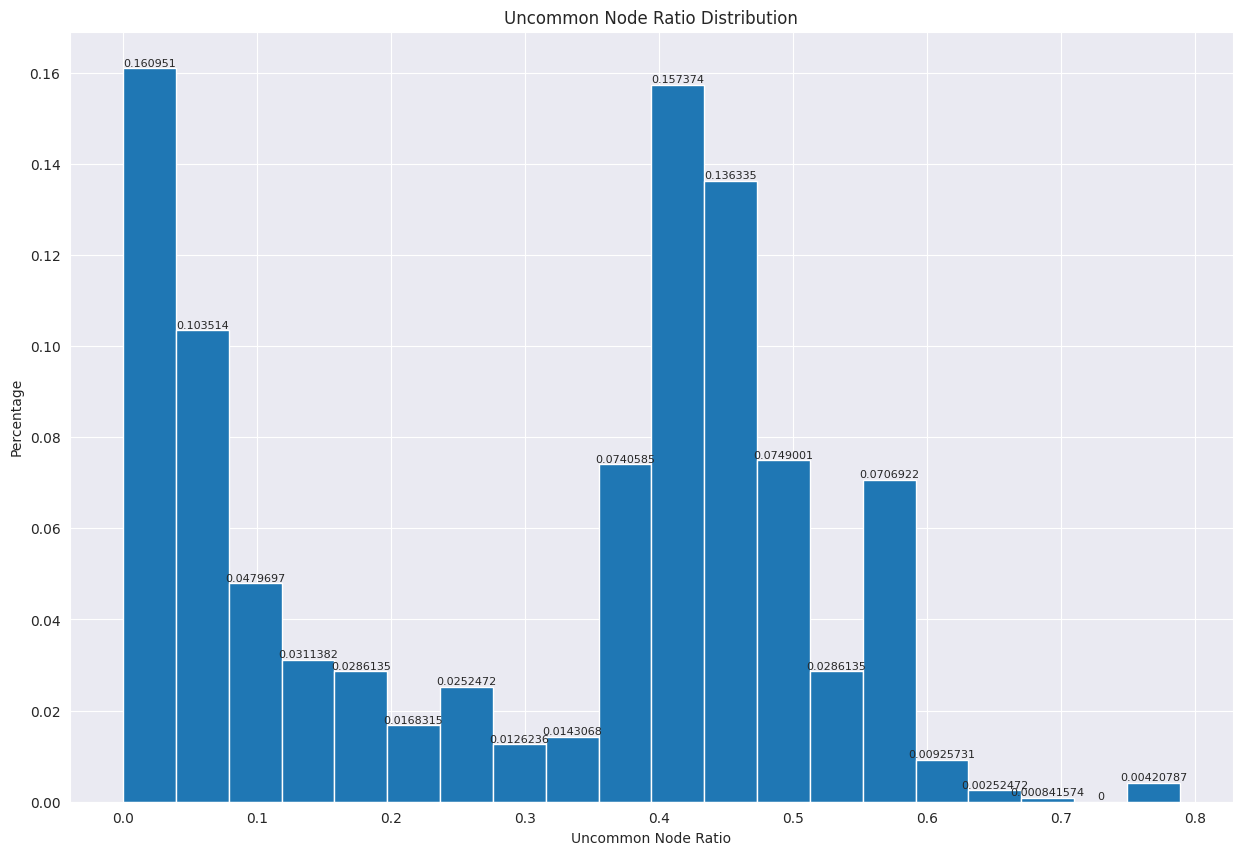

In [103]:
plt.figure(figsize=(15, 10))
values, bins, bars = plt.hist(df['uncommon_nodes']/df['nodes'], edgecolor='white', bins=20, weights=np.ones(len(df)) / len(df))
plt.xlabel("Uncommon Node Ratio")
plt.ylabel("Percentage")
plt.title('Uncommon Node Ratio Distribution')
plt.bar_label(bars, fontsize=8)
plt.show()

In [104]:
uncommon_nodes_ratio_values = [0.05 * i for i in range(20)]
uncommon_nodes_ratio_prob = np.array([.161, .103, .048, .031, .028, .016, .025, .012, .014, .074, .157, .136, .075, .028, .07, .009, .0025, .00084, .0000001, .004])
uncommon_nodes_ratio_prob /= sum(uncommon_nodes_ratio_prob)
uncommon_nodes_ratio = np.random.choice(uncommon_nodes_ratio_values, num_reps, p=uncommon_nodes_ratio_prob)

In [105]:
sample_df['uncommon_nodes'] = uncommon_nodes_ratio * sample_df['nodes']
sample_df['uncommon_edges'] = uncommon_edges_ratio * sample_df['edges']
sample_df['nodes_X_edges'] = sample_df['nodes'] * sample_df['edges']
sample_df['uncommon_nodes_X_uncommon_edges'] = sample_df['uncommon_nodes'] * sample_df['uncommon_edges']
sample_df['time'] = sample_df['uncommon_nodes_X_uncommon_edges'] * 0.00013556 + 37.671896
sample_df

,nodes,edges,uncommon_nodes,uncommon_edges,nodes_X_edges,uncommon_nodes_X_uncommon_edges,time
0,837.30,2515,586.1100,1383.25,2105809.50,8.107367e+05,147.575357
1,1099.65,5317,54.9825,4519.45,5846839.05,2.484907e+05,71.357290
2,941.09,986,282.3270,640.90,927914.74,1.809434e+05,62.200580
3,797.65,2005,119.6475,1403.50,1599288.25,1.679253e+05,60.435845
4,1380.14,4919,552.0560,2951.40,6788908.66,1.629338e+06,258.544966
...,...,...,...,...,...,...,...
995,1361.79,3226,680.8950,2742.10,4393134.54,1.867082e+06,290.773556
996,564.61,665,28.2305,565.25,375465.65,1.595729e+04,39.835066
997,1229.70,7216,61.4850,1082.40,8873515.20,6.655136e+04,46.693599
998,940.92,1430,282.2760,1358.50,1345515.60,3.834719e+05,89.655353


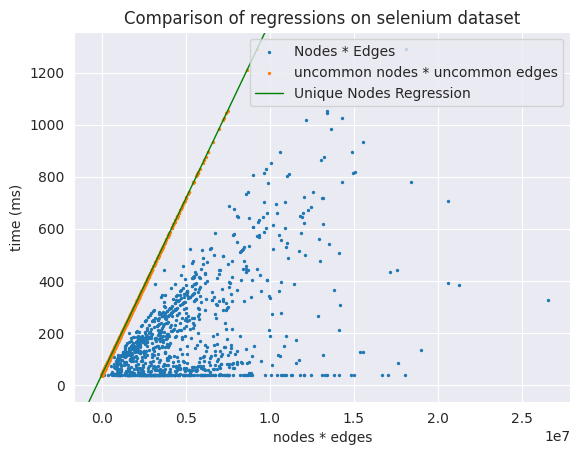

In [106]:
# Create a scatter plot for all metrics

plt.scatter(sample_df['nodes_X_edges'], sample_df['time'], label='Nodes * Edges', s=2)
plt.scatter(sample_df['uncommon_nodes_X_uncommon_edges'], sample_df['time'], label='uncommon nodes * uncommon edges', s=2)
plt.axline((0, 37.6719), (-37.6719/0.00013556, 0), linewidth=1, color='g', label='Unique Nodes Regression')

# Customize the plot
plt.xlabel('nodes * edges')
plt.ylabel('time (ms)')
plt.title('Comparison of regressions on selenium dataset')
plt.legend()

# Display the plot
plt.show()

<Axes: ylabel='Frequency'>

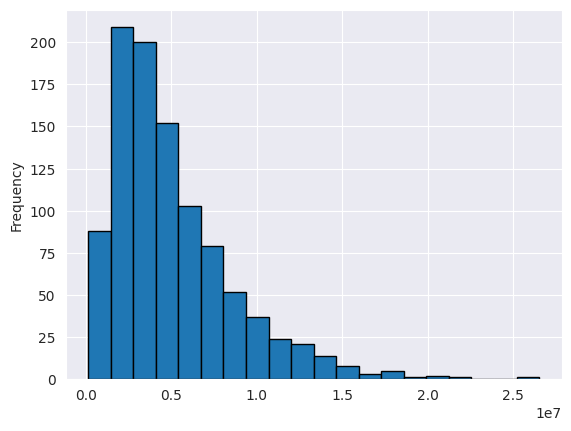

In [107]:
sample_df['nodes_X_edges'].plot(kind='hist', edgecolor='black', bins=20)

ValueError: empty range for randrange() (153, 117, -36)

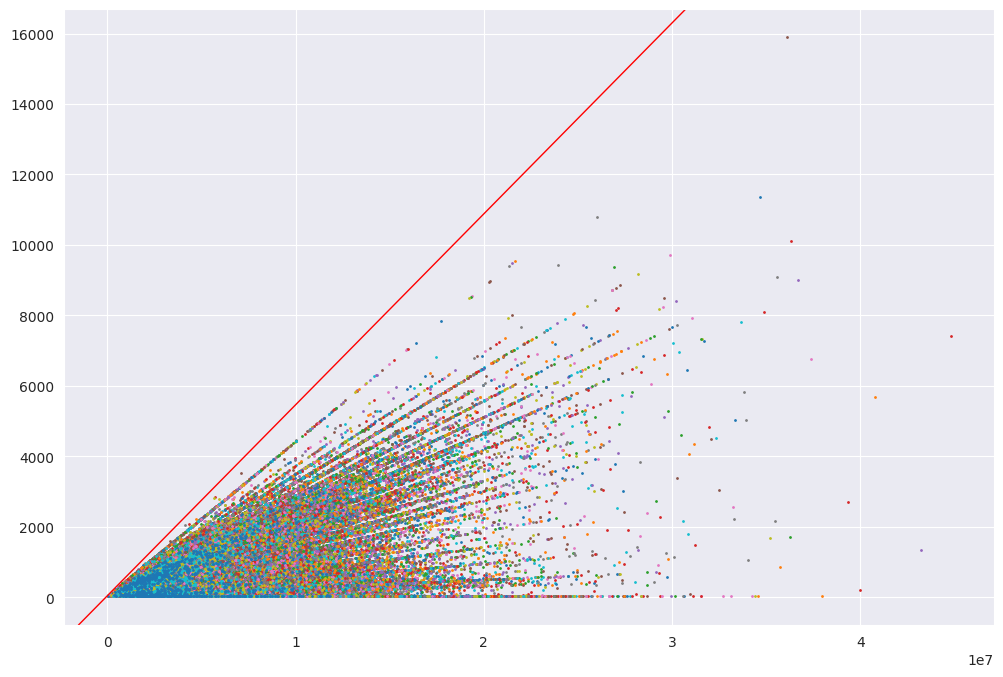

In [115]:
all_stats = []

# Create a scatter plot for all metrics
plt.figure(figsize=(12, 8))
plt.axline((0, 37.6718959976657), (-37.6718959976657/0.0005422200003253764, 0), linewidth=1, color='r', label='Regression')

# Loop through many simulations
for i in range(num_simulations):
    # Choose random inputs for the sales targets and percent to target
    sample_nodes = np.random.normal(nodes_avg, nodes_std_dev, num_reps).round(2)
    # sample_nodes = sample_nodes[sample_nodes > 0]
    # num_reps = sample_nodes.size
    sample_df = pd.DataFrame(index=range(num_reps), data={'nodes': sample_nodes})
    sample_df['edges'] = sample_df['nodes'].apply(calc_edges)
    uncommon_nodes_ratio = np.random.choice(uncommon_nodes_ratio_values, num_reps, p=uncommon_nodes_ratio_prob)
    uncommon_edges_ratio = np.random.choice(uncommon_edges_ratio_values, num_reps, p=uncommon_edges_ratio_prob)

    sample_df['uncommon_nodes'] = uncommon_nodes_ratio * sample_df['nodes']
    sample_df['uncommon_edges'] = uncommon_edges_ratio * sample_df['edges']
    sample_df['nodes_X_edges'] = sample_df['nodes'] * sample_df['edges']
    sample_df['uncommon_nodes_X_uncommon_edges'] = sample_df['uncommon_nodes'] * sample_df['uncommon_edges']
    sample_df['time'] = sample_df['uncommon_nodes_X_uncommon_edges'] * 0.00054406 + 36.02711742

    plt.scatter(sample_df['nodes_X_edges'], sample_df['time'], s=1)
    # plt.scatter(sample_df['uncommon_nodes_X_uncommon_edges'], sample_df['time'], s=1)

# Customize the plot
plt.xlabel('nodes * edges')
plt.ylabel('time (ms)')
plt.title('Comparison of regressions on selenium dataset')
plt.legend()

# Display the plot
plt.show()